In [53]:
import yfinance as yf 
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [54]:
end_date = datetime.today().strftime('%Y-%m-%d')
spy = yf.download('SPY', start='1993-01-29', end=end_date)

[*********************100%***********************]  1 of 1 completed


1. **Simple Return**:  
   $R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$

2. **Log Return**:  
   $R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$

In [56]:
spy = spy.drop(columns=["Open", "High", "Low", "Close", "Volume"])
spy.reset_index(inplace=True)
spy = spy.rename(columns={"Adj Close": "close_price", "Date": "date"})
spy["date"] = pd.to_datetime(spy["date"])
spy['simple_return'] = (spy['close_price'] - spy['close_price'].shift(1)) / spy['close_price'].shift(1)
spy['log_return'] = np.log(spy['close_price'] / spy['close_price'].shift(1))
spy['days_elapsed'] = (spy['date'] - spy['date'].iloc[0]).dt.days
spy['log_return'] = spy['log_return'].fillna(0)
spy['simple_return'] = spy['simple_return'].fillna(0)
spy["close_price"] = spy["close_price"].round(2)

In [57]:
# Create DataFrame for monthly only data 

spy.set_index('date', inplace=True)  
spy_month = spy.resample('MS').first().reset_index()  # 'MS' for monthly start
spy_month['log_return'] = np.log(spy_month['close_price'] / spy_month['close_price'].shift(1))
spy_month = spy_month.dropna(subset=['log_return'])
spy_month

,date,close_price,simple_return,log_return,days_elapsed
1,1993-02-01,24.78,0.007113,0.006884,3
2,1993-03-01,24.80,-0.002815,0.000807,31
3,1993-04-01,25.34,-0.003458,0.021541,62
4,1993-05-01,24.94,0.006388,-0.015911,94
5,1993-06-01,25.69,0.009675,0.029629,123
...,...,...,...,...,...
379,2024-08-01,541.35,-0.014161,-0.004276,11507
380,2024-09-01,550.39,-0.020579,0.016561,11540
381,2024-10-01,568.62,-0.008958,0.032585,11568
382,2024-11-01,571.04,0.004221,0.004247,11599


In [58]:
spy.shape

(8031, 4)

In [59]:
spy_week = spy.resample('W').first().reset_index()  # 'W' for weekly start
spy_week['log_return'] = np.log(spy_week['close_price'] / spy_week['close_price'].shift(1))
spy_week = spy_week.dropna(subset=['log_return'])
spy_week

,date,close_price,simple_return,log_return,days_elapsed
1,1993-02-07,24.78,0.007113,0.006884,3
2,1993-02-14,25.19,0.000000,0.016410,10
3,1993-02-21,24.35,-0.025227,-0.033915,18
4,1993-02-28,24.49,0.003587,0.005733,24
5,1993-03-07,24.80,-0.002815,0.012579,31
...,...,...,...,...,...
1660,2024-11-24,588.15,0.004097,-0.017879,11616
1661,2024-12-01,597.53,0.003392,0.015822,11623
1662,2024-12-08,603.63,0.001792,0.010157,11630
1663,2024-12-15,604.68,-0.005150,0.001738,11637


In [60]:
spy.reset_index(inplace=True)

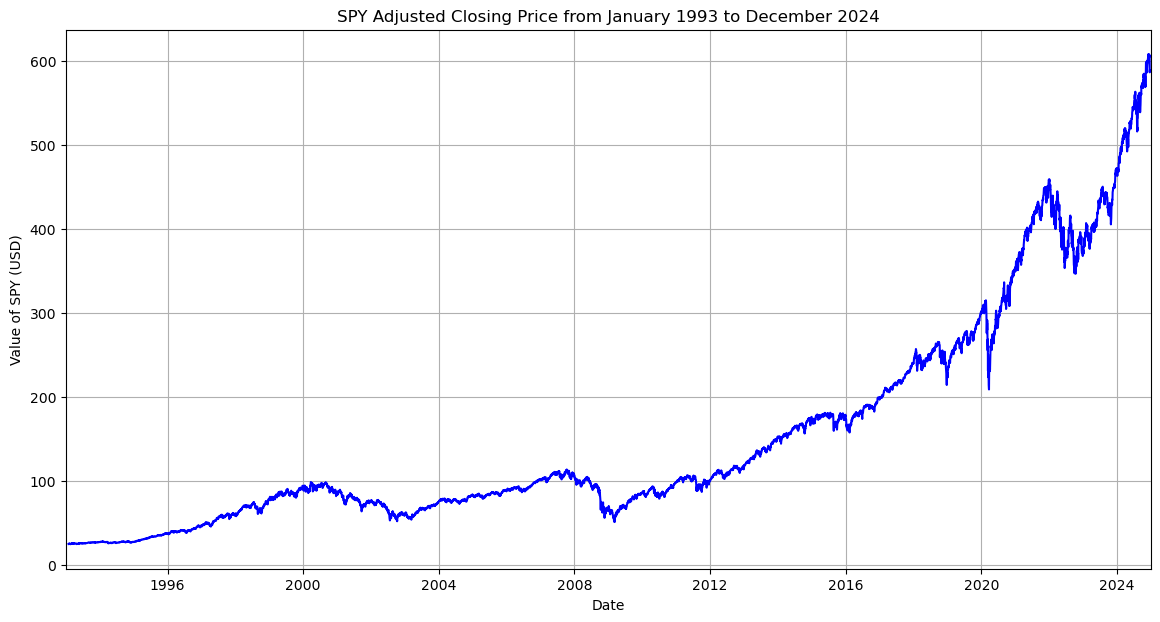

In [61]:
plt.figure(figsize=(14, 7))
plt.plot(spy["date"], spy["close_price"], color="blue", label="No Inflation")
plt.title("SPY Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

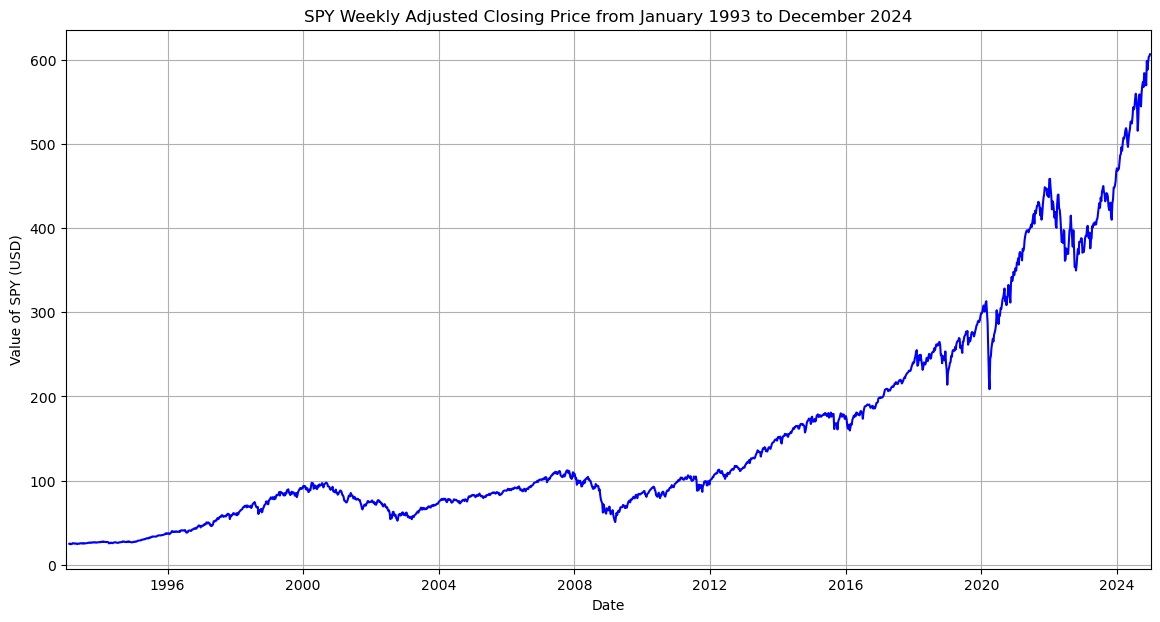

In [62]:
plt.figure(figsize=(14, 7))
plt.plot(spy_week["date"], spy_week["close_price"], color="blue", label="No Inflation")
plt.title("SPY Weekly Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

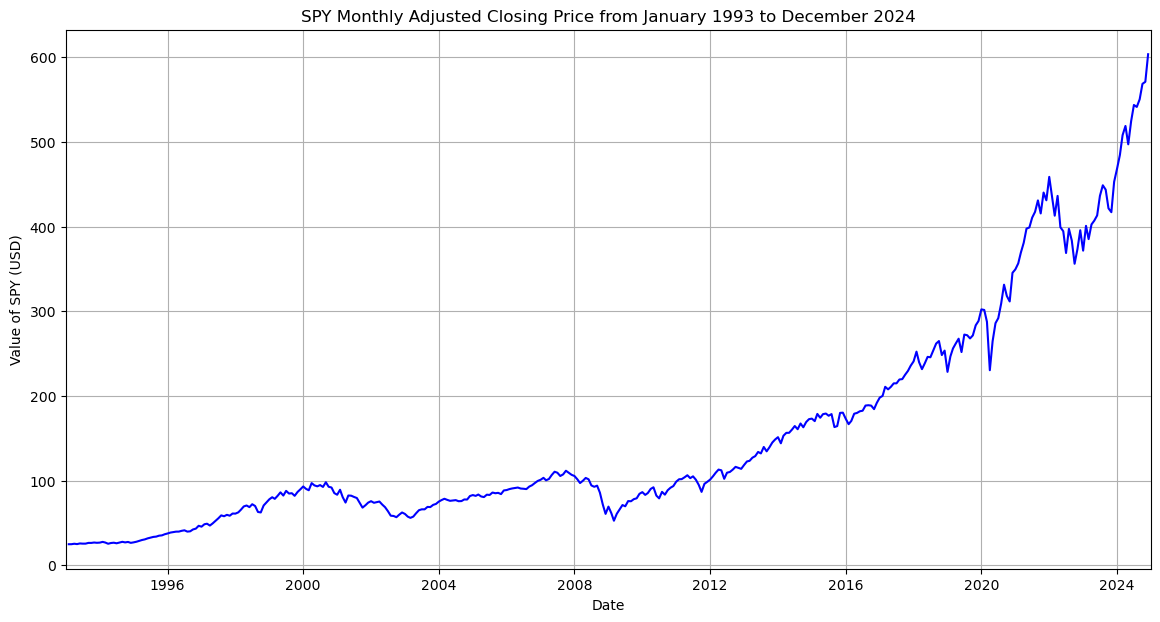

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(spy_month["date"], spy_month["close_price"], color="blue", label="No Inflation")
plt.title("SPY Monthly Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

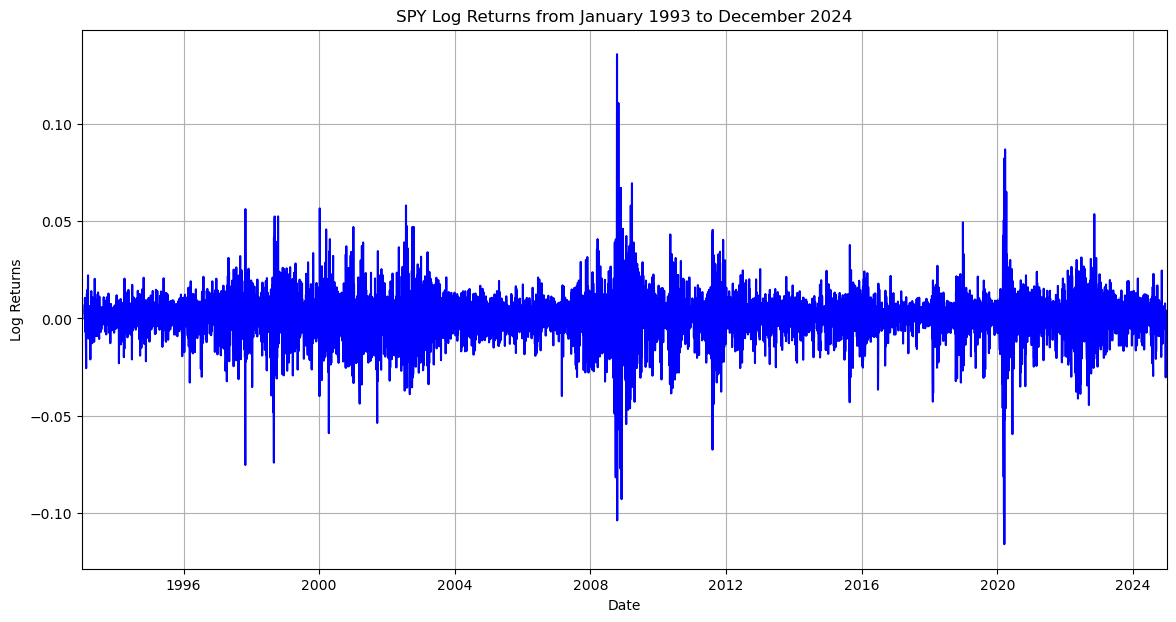

In [64]:
plt.figure(figsize=(14, 7))
plt.plot(spy["date"], spy["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

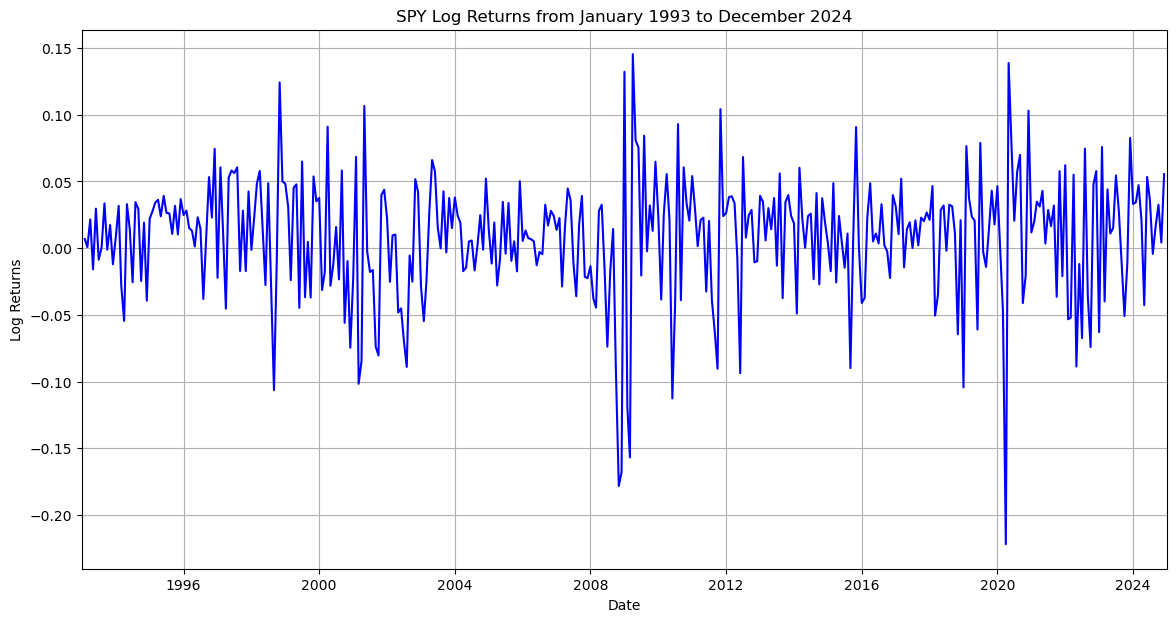

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(spy_month["date"], spy_month["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

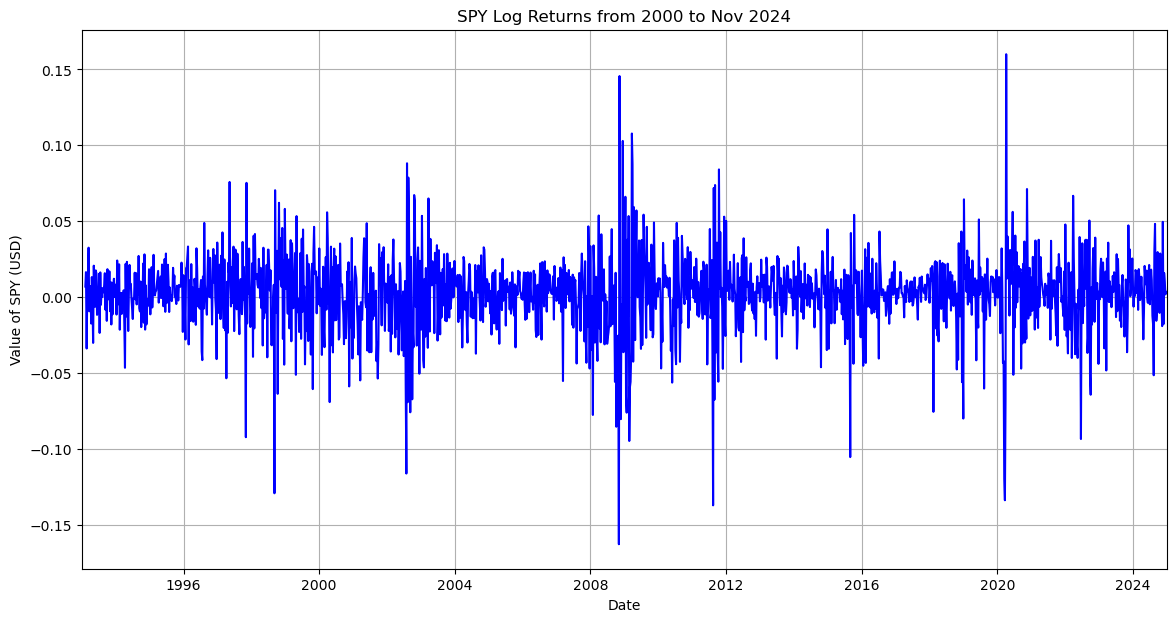

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(spy_week["date"], spy_week["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from 2000 to Nov 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.savefig("spy_1_diff.png")
plt.show()

In [67]:
spy.to_csv('spy_full.csv', index=False)
spy_week.to_csv('spy_week.csv', index=False)
spy_month.to_csv('spy_month.csv', index=False)